In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("dataframe/all_summary_statistics.csv")

In [33]:
temp_model = "n0_no_smoothing"
model = df[df["model"] == temp_model]
model_rmse = model[model["summary_statistic"] == "RMSE"].reset_index(drop=True)
model_std = model[model["summary_statistic"] == "StDev"].reset_index(drop=True)

In [25]:
model_pivot = pd.pivot_table(model_ss, index=["model", "quantile", "param"],
                             columns=["summary_statistic"],
                             values=["Cramer-von Mises Distance", "Energy Distance", "Kullback-Leibler Divergence", "Maximum Mean Discrepancy",
                                     "Wasserstein Distance"])

model_pivot.columns = model_pivot.columns.map(' '.join).str.strip(' ')
model_pivot.reset_index(inplace=True)
model_pivot

,model,quantile,param,Cramer-von Mises Distance RMSE,Cramer-von Mises Distance StDev,Energy Distance RMSE,Energy Distance StDev,Kullback-Leibler Divergence RMSE,Kullback-Leibler Divergence StDev,Maximum Mean Discrepancy RMSE,Maximum Mean Discrepancy StDev,Wasserstein Distance RMSE,Wasserstein Distance StDev
0,n0_no_smoothing,0.1%,a,0.579583,0.092504,0.071627,0.184338,0.013648,1.484334,0.082817,0.188143,0.089600,0.183769
1,n0_no_smoothing,0.1%,b,2.165370,0.489009,0.040494,0.190671,0.308975,1.036479,0.057358,0.193282,0.030755,0.204981
2,n0_no_smoothing,1%,a,0.366479,0.266125,0.029353,0.411057,0.042052,0.920378,0.216799,0.519984,0.272822,0.358930
3,n0_no_smoothing,1%,b,3.517771,1.877110,0.621571,0.926053,0.469066,1.237469,0.180015,0.646688,0.557561,3.024545
4,n0_no_smoothing,5%,a,0.009756,1.166512,0.024473,0.732422,0.862123,1.154506,0.822264,1.281447,0.652671,0.586866
5,n0_no_smoothing,5%,b,5.047995,2.436593,2.026839,3.852175,1.142729,1.626755,0.864066,2.829328,3.070662,4.768263


In [34]:
model_rmse

,model,quantile,param,summary_statistic,Cramer-von Mises Distance,Energy Distance,Kullback-Leibler Divergence,Maximum Mean Discrepancy,Wasserstein Distance
0,n0_no_smoothing,5%,a,RMSE,0.009756,0.024473,0.862123,0.822264,0.652671
1,n0_no_smoothing,5%,b,RMSE,5.047995,2.026839,1.142729,0.864066,3.070662
2,n0_no_smoothing,1%,a,RMSE,0.366479,0.029353,0.042052,0.216799,0.272822
3,n0_no_smoothing,1%,b,RMSE,3.517771,0.621571,0.469066,0.180015,0.557561
4,n0_no_smoothing,0.1%,a,RMSE,0.579583,0.071627,0.013648,0.082817,0.089600
5,n0_no_smoothing,0.1%,b,RMSE,2.165370,0.040494,0.308975,0.057358,0.030755


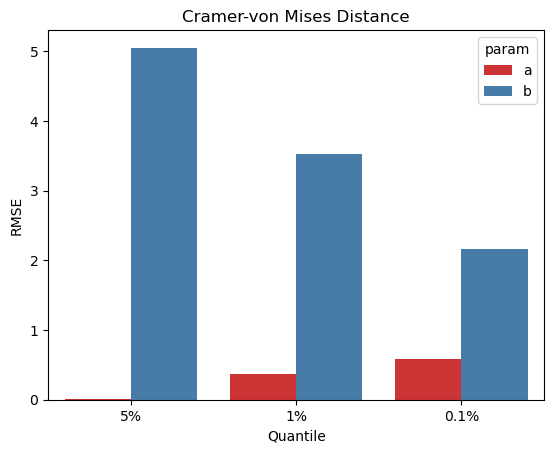

In [39]:
sns.barplot(data=model_rmse, x="quantile", y="Cramer-von Mises Distance", hue="param", palette = "Set1")
plt.title("Cramer-von Mises Distance")
plt.xlabel("Quantile")
plt.ylabel("RMSE")
plt.show()

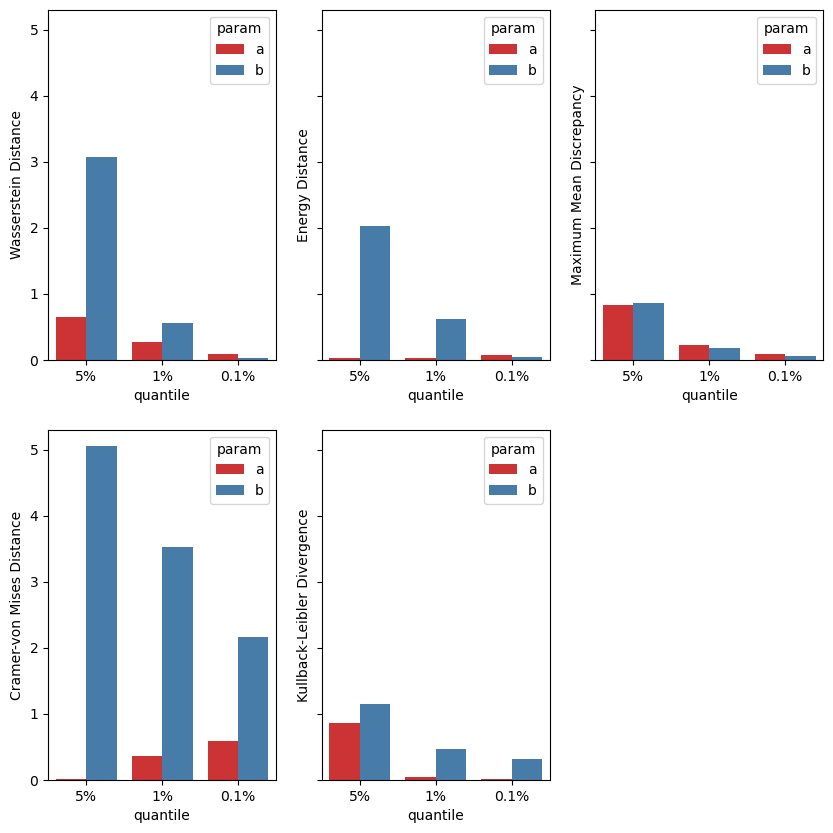

In [45]:
distances = ["Wasserstein Distance", "Energy Distance", "Maximum Mean Discrepancy", "Cramer-von Mises Distance", "Kullback-Leibler Divergence"]

fig, axes = plt.subplots(2, 3, sharey=True, figsize=(10, 10))
axes[1, 2].axis("off")
ax = axes.flatten()

for i, d in enumerate(distances):
    sns.barplot(data=model_rmse, x="quantile", y=d, hue="param", palette = "Set1", ax=ax[i])

plt.show()